<a href="https://colab.research.google.com/github/egyptai/DecisionTree/blob/main/20210607DecisionTreeTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
from google.colab import files
myfile = files.upload()

Saving train.csv to train (1).csv


In [20]:
df = pd.read_csv("train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Cabin'].fillna('N', inplace = True)
df['Embarked'].fillna('N', inplace = True)

In [23]:
df['Pclass'].value_counts()
df['Sex'].value_counts()
df['Cabin'].value_counts()
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [24]:
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [25]:
name = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
name.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Mme           1
Sir           1
Jonkheer      1
Capt          1
Countess      1
Ms            1
Don           1
Name: Name, dtype: int64

In [26]:
title = ['Mr', 'Mrs', 'Master']
df['Title'] = [x if x in title else 'Other' for x in name]

In [27]:
le = {}
for feat in ['Cabin', 'Sex', 'Embarked', 'Title']:
  le[feat] = LabelEncoder()
  df[feat] = le[feat].fit_transform(df[feat])

In [28]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,7,3,1
1,1,1,0,38.0,1,0,71.2833,2,0,2
2,1,3,0,26.0,0,0,7.9250,7,3,3
3,1,1,0,35.0,1,0,53.1000,2,3,2
4,0,3,1,35.0,0,0,8.0500,7,3,1


In [29]:
target_data = df['Survived']
feature_data = df.drop('Survived', axis=1)
x_train, x_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.2)

In [30]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy = {0:.2f}".format(accuracy))

Decision Tree accuracy = 0.83


In [33]:
feat_impo = dt.feature_importances_
feat_name = feature_data.columns

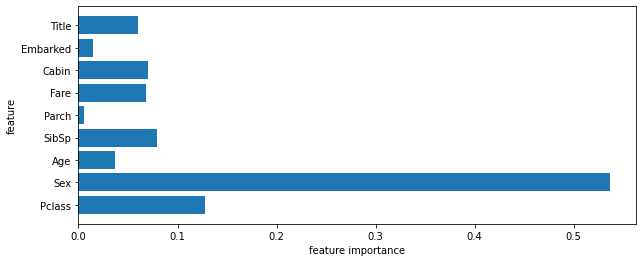

In [34]:
plt.figure(figsize=(10,4))
x_idx = np.arange(len(feat_name))
plt.barh(x_idx, feat_impo, align = 'center')
plt.yticks(x_idx, feat_name)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()